      Serotype                                          Sequences
0         H1N1  DTICIGYHANNSTDTVDTVLEKNVTVTHSVNLLEDNHNGKLCLLKG...
1         H1N1  DTICIGYHANNSTDTVDTVLEKNVTVTHSVNLLEDNHNGKLCLLKG...
2         H1N1  DTICIGYHANNSTDTVDTVLEKNVTVTHSVNLLEDSHNGKLCLLKG...
3         H1N1  DTICIGYHANNSTDTVDTVLEKNVTVTHSVNLLENSHNGKLCLLKG...
4         H1N1  DTICIGYHANNSTDTVDTVLEKNVTVTHSVNLLEDSHNGKLCLLKG...
...        ...                                                ...
13362  Av-H5N1  MERIVIALAIISIVKGDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...
13363  Av-H5N1  MERIVIALAIISIVKGXXDQICIGYHANNSTEQVDTIMEKNVTVTH...
13364  Av-H5N1  MEKIVLLLAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...
13365  Av-H5N1  MEKIVLLLAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...
13366  Av-H5N1  MEKIVLLFAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...

[13367 rows x 2 columns]


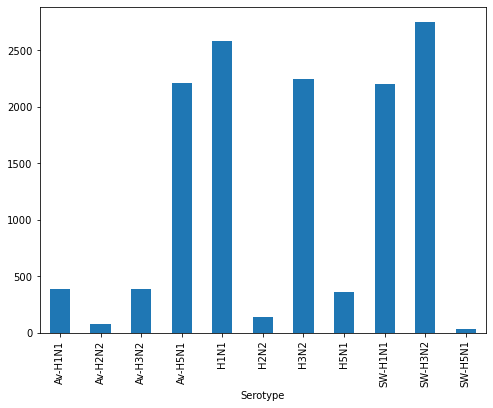

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
%matplotlib inline


def readSeq(filename):

    with open(filename, 'r') as f:
        data = ''
        name_list = []
        seq_list = []

        for line in f:

            line = line.rstrip()
            for i in line:
                if i == '>':
                    name_list.append(line)
                    if data:
                        seq_list.append(data)
                        data = ''
                    break
                else:
                    line = line.upper()
            if all([k == k.upper() for k in line]):
                data = data + line
    return seq_list


def printHuman1():
    seqN = []
    seq = readSeq('H1N1.txt')
    for i in seq:
        seqN.append(i)
        
    mydict = {'Serotype':"H1N1", 'Sequences':seqN}
    return pd.DataFrame(mydict)
h1n1 = printHuman1()
def printHuman2():
    seqN = []
    seq = readSeq('H2N2.txt')
    for i in seq:
        seqN.append(i)
        
    mydict = {'Serotype':"H2N2", 'Sequences':seqN}
    return pd.DataFrame(mydict)
h2n2 = printHuman2()
def printHuman3():
    seqN = []
    seq = readSeq('H3N2.txt')
    for i in seq:
        seqN.append(i)
        
    mydict = {'Serotype':"H3N2", 'Sequences':seqN}
    return pd.DataFrame(mydict)
h3n2 = printHuman3()
def printHuman5():
    seqN = []
    seq = readSeq('H5N1.txt')
    for i in seq:
        seqN.append(i)
        
    mydict = {'Serotype':"H5N1", 'Sequences':seqN}
    return pd.DataFrame(mydict)
h5n1 = printHuman5()
def printAvian1():
    seqN = []
    seq = readSeq('Av-H1N1.txt')
    for i in seq:
        seqN.append(i)
        
    mydict = {'Serotype':"Av-H1N1", 'Sequences':seqN}
    return pd.DataFrame(mydict)
avian1 = printAvian1()
def printAvian2():
    seqN = []
    seq = readSeq('Av-H2N2.txt')
    for i in seq:
        seqN.append(i)
        
    mydict = {'Serotype':"Av-H2N2", 'Sequences':seqN}
    return pd.DataFrame(mydict)
avian2 = printAvian2()
def printAvian3():
    seqN = []
    seq = readSeq('Av-H3N2.txt')
    for i in seq:
        seqN.append(i)
        
    mydict = {'Serotype':"Av-H3N2", 'Sequences':seqN}
    return pd.DataFrame(mydict)
avian3 = printAvian3()
def printAvian5():
    seqN = []
    seq = readSeq('Av-H5N1.txt')
    for i in seq:
        seqN.append(i)
        
    mydict = {'Serotype':"Av-H5N1", 'Sequences':seqN}
    return pd.DataFrame(mydict)
avian5 = printAvian5()
def printSwine1():
    seqN = []
    seq = readSeq('SW-H1N1.txt')
    for i in seq:
        seqN.append(i)
        
    mydict = {'Serotype':"SW-H1N1", 'Sequences':seqN}
    return pd.DataFrame(mydict)
swine1 = printSwine1()
def printSwine3():
    seqN = []
    seq = readSeq('SW-H3N2.txt')
    for i in seq:
        seqN.append(i)
        
    mydict = {'Serotype':"SW-H3N2", 'Sequences':seqN}
    return pd.DataFrame(mydict)
swine3 = printSwine3()
def printSwine5():
    seqN = []
    seq = readSeq('SW-H5N1.txt')
    for i in seq:
        seqN.append(i)
        
    mydict = {'Serotype':"SW-H5N1", 'Sequences':seqN}
    return pd.DataFrame(mydict)
swine5 = printSwine5()
df_row = pd.concat([h1n1, h2n2, h3n2, h5n1, swine1, swine3, swine5, avian1, avian2, avian3, avian5], ignore_index=True)
print(df_row)
counts = df_row.Serotype.value_counts()
# print(counts)

#plot counts
# plt.figure()
# sns.distplot(counts, hist = False, color = 'purple')
# plt.title('Count Distribution for Serotpes Types')
# plt.ylabel('% of records')
# plt.show()
fig = plt.figure(figsize=(8,6))
df_row.groupby('Serotype').Sequences.count().plot.bar(ylim=0)
plt.show()

In [2]:
def getNGram(sequence, size=7):
    return [sequence[i:i+size].lower() for i in range(len(sequence) - size + 1)]

df_row['words'] = df_row.apply(lambda x: getNGram(x['Sequences']), axis=1)
df_row = df_row.drop('Sequences', axis=1)
print(df_row)

      Serotype                                              words
0         H1N1  [dticigy, ticigyh, icigyha, cigyhan, igyhann, ...
1         H1N1  [dticigy, ticigyh, icigyha, cigyhan, igyhann, ...
2         H1N1  [dticigy, ticigyh, icigyha, cigyhan, igyhann, ...
3         H1N1  [dticigy, ticigyh, icigyha, cigyhan, igyhann, ...
4         H1N1  [dticigy, ticigyh, icigyha, cigyhan, igyhann, ...
...        ...                                                ...
13362  Av-H5N1  [merivia, erivial, riviala, ivialai, vialaii, ...
13363  Av-H5N1  [merivia, erivial, riviala, ivialai, vialaii, ...
13364  Av-H5N1  [mekivll, ekivlll, kivllla, ivlllai, vlllaiv, ...
13365  Av-H5N1  [mekivll, ekivlll, kivllla, ivlllai, vlllaiv, ...
13366  Av-H5N1  [mekivll, ekivllf, kivllfa, ivllfai, vllfaiv, ...

[13367 rows x 2 columns]


In [3]:
df_row.loc[df_row["Serotype"]=='H1N1', "Serotype"]= 0
df_row.loc[df_row["Serotype"]=='H2N2', "Serotype"]= 1
df_row.loc[df_row["Serotype"]=='H3N2', "Serotype"]= 2
df_row.loc[df_row["Serotype"]=='H5N1', "Serotype"]= 3
df_row.loc[df_row["Serotype"]=='SW-H1N1', "Serotype"]= 4
df_row.loc[df_row["Serotype"]=='SW-H3N2', "Serotype"]= 5
df_row.loc[df_row["Serotype"]=='SW-H5N1', "Serotype"]= 6
df_row.loc[df_row["Serotype"]=='Av-H1N1', "Serotype"]= 7
df_row.loc[df_row["Serotype"]=='Av-H2N2', "Serotype"]= 8
df_row.loc[df_row["Serotype"]=='Av-H3N2', "Serotype"]= 9
df_row.loc[df_row["Serotype"]=='Av-H5N1', "Serotype"]= 10
print(df_row)

      Serotype                                              words
0            0  [dticigy, ticigyh, icigyha, cigyhan, igyhann, ...
1            0  [dticigy, ticigyh, icigyha, cigyhan, igyhann, ...
2            0  [dticigy, ticigyh, icigyha, cigyhan, igyhann, ...
3            0  [dticigy, ticigyh, icigyha, cigyhan, igyhann, ...
4            0  [dticigy, ticigyh, icigyha, cigyhan, igyhann, ...
...        ...                                                ...
13362       10  [merivia, erivial, riviala, ivialai, vialaii, ...
13363       10  [merivia, erivial, riviala, ivialai, vialaii, ...
13364       10  [mekivll, ekivlll, kivllla, ivlllai, vlllaiv, ...
13365       10  [mekivll, ekivlll, kivllla, ivlllai, vlllaiv, ...
13366       10  [mekivll, ekivllf, kivllfa, ivllfai, vllfaiv, ...

[13367 rows x 2 columns]


In [4]:
df = list(df_row['words'])
for item in range(len(df)):
    df[item] =' '.join(df[item])
# print(df[0])

In [5]:
# df_X = df
df_Y = df_row.iloc[:, 0].values
# print(df_Y)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_vector = CountVectorizer(max_features=2500, ngram_range=(4,4))



x_traincv = X_vector.fit_transform(df).toarray()

X_train, X_test, y_train, y_test = train_test_split(x_traincv, df_Y, test_size = 0.20, random_state=1)

print(X_train.shape)
y_train = y_train.astype('int')

(10693, 2500)


In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_curve, auc

y_pred = knn.predict(X_test)
y_test = y_test.astype('int')
print("Training set score: {:.3f}".format(knn.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(knn.score(X_test, y_test)))
print('**********************************************************************************')
print()
print()
# print('Balanced Parameters')
# print(np.unique(y_pred, return_counts=True))
# print(np.unique(y_test, return_counts=True))
print()
print('Confusion Matrix')
print()
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def conf_matx(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = conf_matx(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Training set score: 0.977
Testing set score: 0.964
**********************************************************************************



Confusion Matrix

Predicted   0   1    2   3    4    5   6   7   8   9    10
Actual                                                    
0          534   1    0   0    1    0   0   0   0   0    0
1            0  27    0   0    0    0   0   0   0   0    0
2            0   0  461   0    0    0   0   0   0   0    0
3            0   0    0  34    0    0   0   0   0   0   47
4            3   0    0   0  416    0   0   2   0   0    0
5            0   0    2   0    0  542   0   0   0   3    0
6            0   0    0   0    0    0   2   0   0   0    7
7            0   1    0   0    1    0   0  57   0   0    0
8            0   3    0   0    0    0   0   0  14   0    0
9            0   0    0   0    1    4   0   0   0  69    0
10           0   2    0  16    0    0   3   0   0   0  421
accuracy = 0.964 
precision = 0.961 
recall = 0.964 
f1 = 0.961


[[534   1   0   0   1   0   0   0   0   0   0]
 [  0  27   0   0   0   0   0   0   0   0   0]
 [  0   0 461   0   0   0   0   0   0   0   0]
 [  0   0   0  34   0   0   0   0   0   0  47]
 [  3   0   0   0 416   0   0   2   0   0   0]
 [  0   0   2   0   0 542   0   0   0   3   0]
 [  0   0   0   0   0   0   2   0   0   0   7]
 [  0   1   0   0   1   0   0  57   0   0   0]
 [  0   3   0   0   0   0   0   0  14   0   0]
 [  0   0   0   0   1   4   0   0   0  69   0]
 [  0   2   0  16   0   0   3   0   0   0 421]]


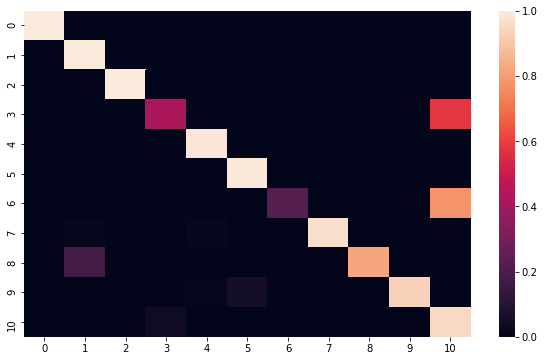

In [9]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
matrix = matrix.astype('float')/ matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.heatmap(matrix)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       536
           1       0.79      1.00      0.89        27
           2       1.00      1.00      1.00       461
           3       0.68      0.42      0.52        81
           4       0.99      0.99      0.99       421
           5       0.99      0.99      0.99       547
           6       0.40      0.22      0.29         9
           7       0.97      0.97      0.97        59
           8       1.00      0.82      0.90        17
           9       0.96      0.93      0.95        74
          10       0.89      0.95      0.92       442

    accuracy                           0.96      2674
   macro avg       0.88      0.84      0.85      2674
weighted avg       0.96      0.96      0.96      2674



In [11]:
# from sklearn.preprocessing import label_binarize
# from itertools import cycle

# y_pred = svm.fit(X_train, y_train).predict_proba(X_test)
# y_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9,10])
# n_classes = y_test.shape[1]

# # Plot linewidth.
# lw = 2

# # Compute ROC curve and ROC area for each class using "fall positive rate" and "true positive rate"
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])



# colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'blue', 'pink', 'red', 'orange', 'purple', 'yellow', 'green', 'navy'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC of different types of Serotypes')
# plt.legend(loc="lower right")
# plt.show()
